<a href="https://colab.research.google.com/github/dlskawns/coz-project/blob/main/spark_installation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* AWS 콘솔 웹사이트를 통해 EC2 인스턴스를 생성
* SSH 또는 secure shell을 통해 EC2에 연결 -> 윈도우, 맥, 리눅스에서 모두 다른 환경을 지님
* 연결 후 스파크 / 주피터노트북을 EC2 인스턴스에 설정


### 인스턴스 생성하기

* 로그인 후 서비스에서 EC2를 찾아서 들어간 뒤, 인스턴스 생성 클릭

* name and tag에서 적당히 key 와 value 값 입력

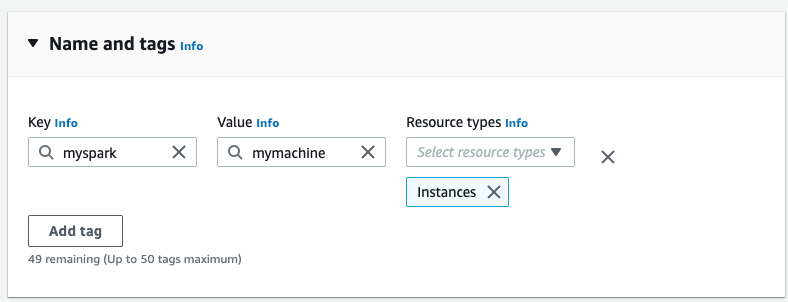

* AMAZON Machine Image를 선택한다. -> 머신 이미지는 우리가 설정하는 가상 컴퓨터에서 원하는 운영체제를 의미



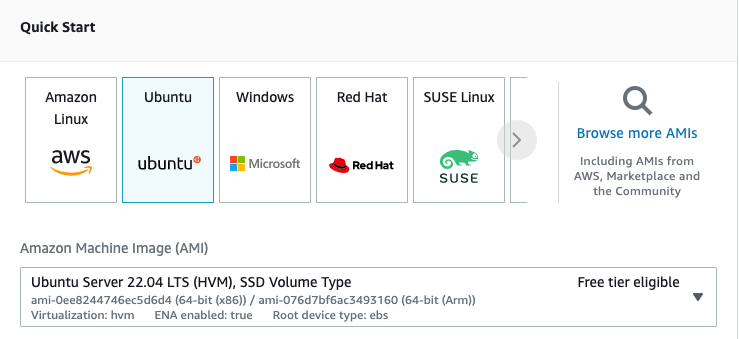

우분투를 선택하고, 하단에 반드시 Free tier eligible이 되어있는지 확인

* 인스턴스 타입 란에서는 t2.micro를 선택 -> 무료중에 그나마 나은 것

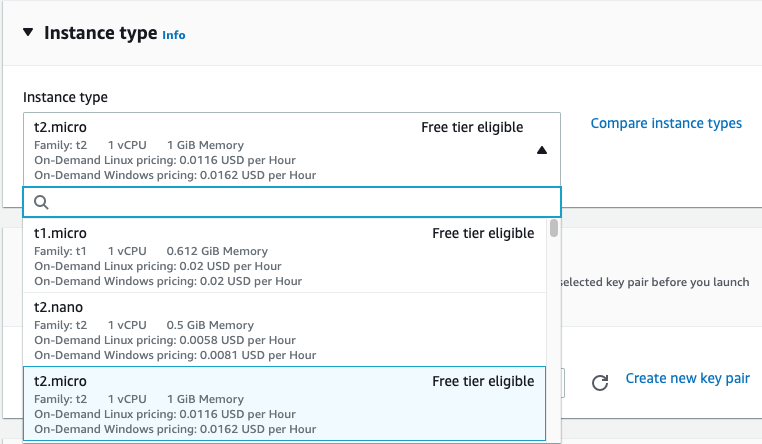

* 우측의 Summary 상에서 인스턴스 개수를 1로 둔다.

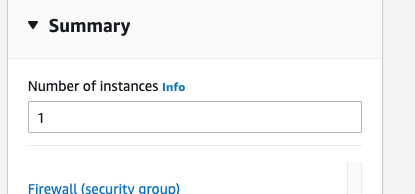

* Network Settings 의 Edit 클릭



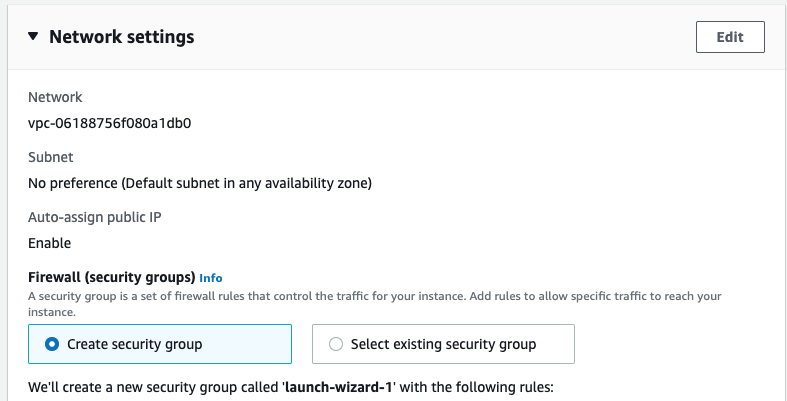

* type을 SSH에서 all traffic으로 변경

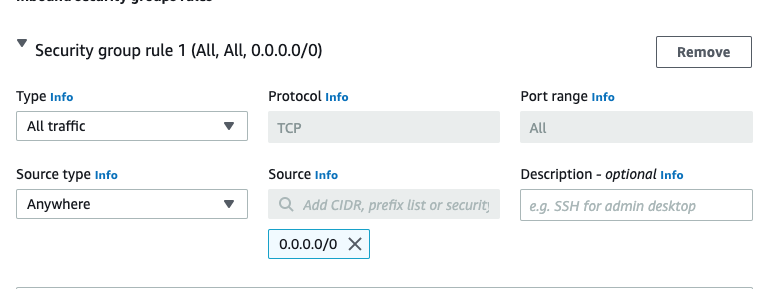

* Launch 하게되면, key pair 설정을 하게 됨
* create a new key pair 선택
* key pair name 작성
* .pem으로 받기 

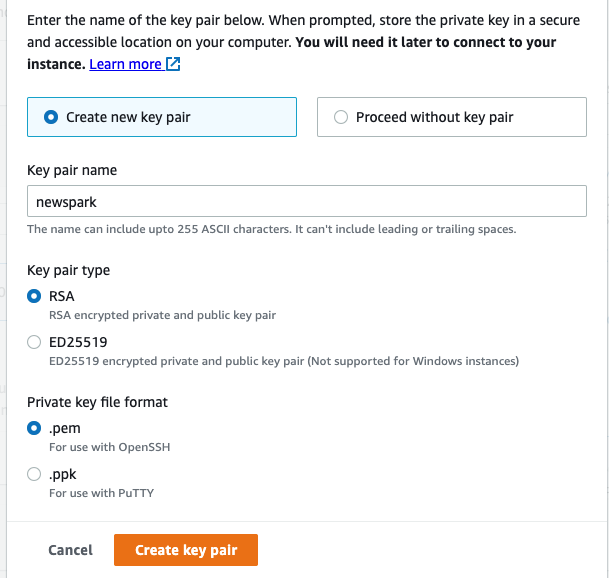

* create key pair를 클릭하면 팝업이 종료되고, .pem이 다운로드 됨 

* 이후 Launch 다시 클릭하면 인스턴스 생성됨

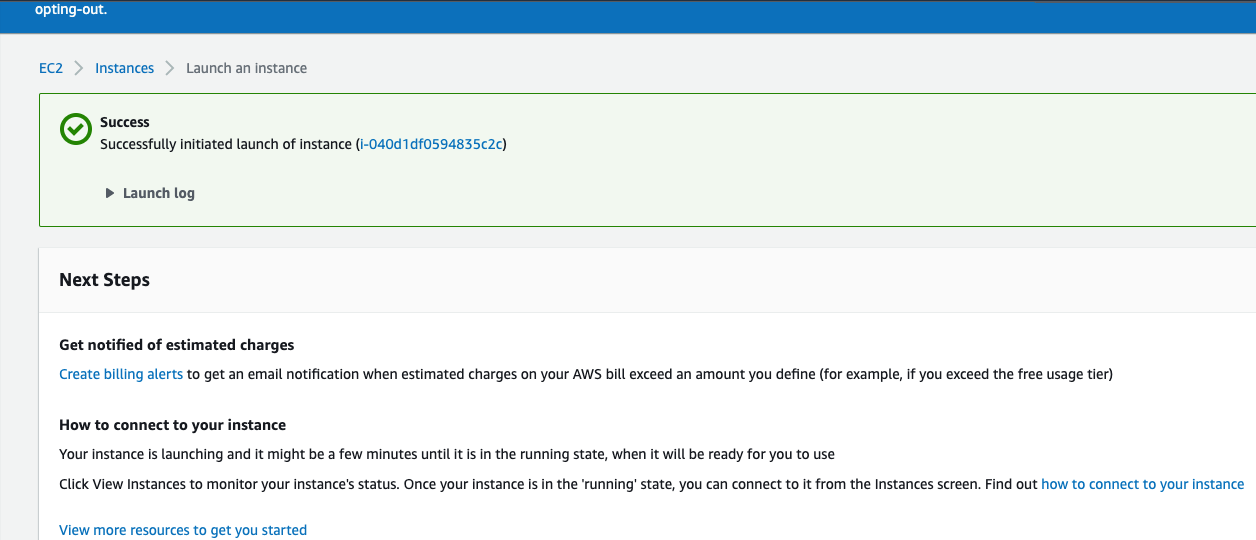

* 인스턴스 ID, 퍼블릭 DNS 등 중요한 정보가 있는 것을 확인할 수 있음

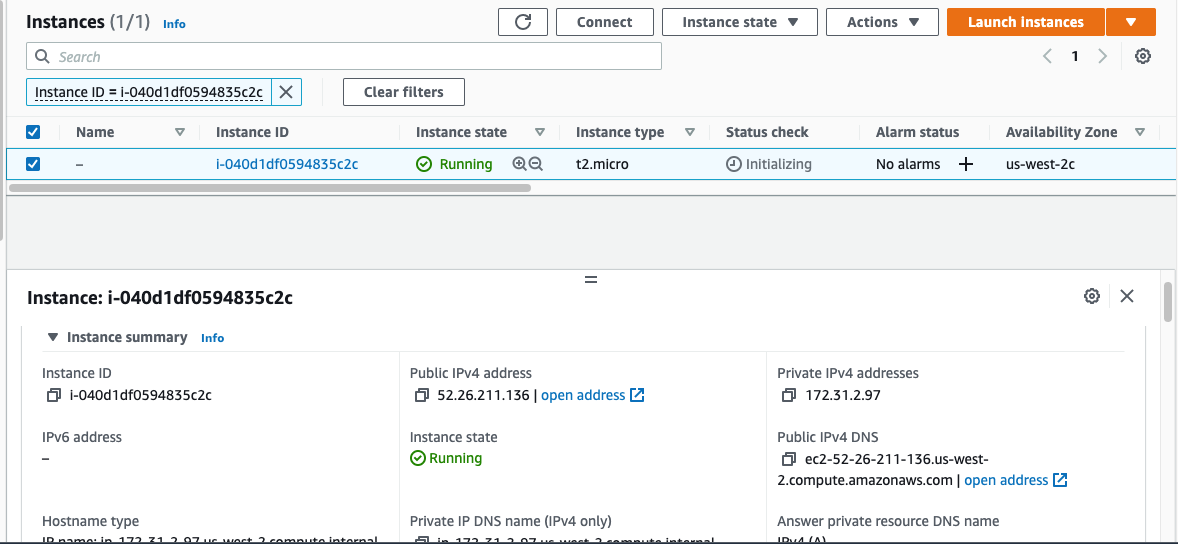

* instance의 사용이 종료되면 반드시 instance state에서 terminate를 해주어야 한다.
* 참고로 프리티어는 12개월동안 한달에 750시간을 준다 -> 한달 내내 실행 가능하며, 작업이 끝났을 때 종료해야함
* 맥과 리눅스를 사용할 경우 여기까지만 진행해도 인스턴스를 끝낼 수 있다. 

### Secure Shell을 이용해 터미널을 통해 인스턴스 연결하기

* 터미널을 켜고 chmod 명령어를 사용해 프라이빗 키 파일이 퍼블릭에서 보이지 않도록 할 것
  * newspark.pem 파일을 데스크톱으로 위치변경 할 것
  * 터미널에서 cd Desktop 입력 엔터 으로 경로 이동
  * chmod 400 newspark.pem 입력 엔터
  * ssh -i newspark.pem ubuntu@DNS 입력 엔터 후 yes 입력 엔터

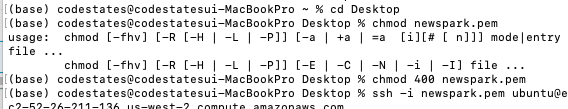

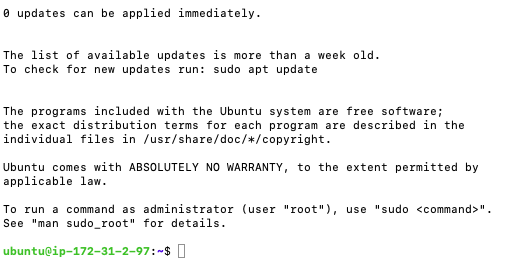

완료가 되면 ubuntu@ip 주소의 형식으로 CLI에 확인이 된다.  
또한 EC2 인스턴스에 대한 명령행 인터페이스가 된다.

### 파이썬 연결하기

* 스파크와 스파크 관련 모든 부속을 다운받고 설치
* 주피터 설치
* 파이스파크 연결
* 로컬 브라우저에서 EC2 주피터 노트북 연결



* 연결 상태에서 sudo apt-get update 입력
  * 파이썬에서 pip3와 같은 것을 설치하기 위한 업데이트
* sudo apt install python3-pip 입력 , Y 입력
* pip3 install jupyter 입력

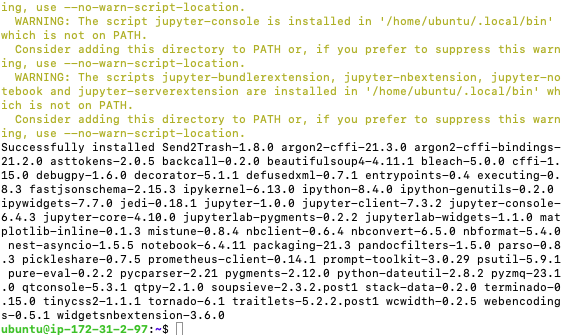

* 자바가 없는 경우를 위해 자바를 설치
  * sudo apt-get install default-jre 입력 , Y 입력
  * 스파크 설치를 위해 Scala 언어가 필요하고, Scala 언어를 위해 Java가 필요하기 때문
* 위와 비슷하게 스칼라를 설치
  * sudo apt-get install scala , Y 입력
* 파이썬을 자바와 연결하기 위해 필요한 py4j 설치
  * pip3 install py4j 입력
* 스파크를 설치
  * wget http://archive.apache.org/dist/spark/spark-2.1.1/spark-2.1.1-bin-hadoop2.7.tgz
  * 버젼은 추후에도 바꿀 수 있다. 
  * tgz파일은 받고 나면 압출을 풀 수 있음
    * sudo tar -zxvf spark-2.1.1-bin-hadoop2.7.tgz 입력
  * ls를 입력해 spark 압축풀어진 폴더를 확인하고, 해당 폴더로 cd를 한다.
    * cd spark-2.1.1-bin-hadoop2.7/
    * 이후 pwd를 입력해서 작업 디렉토리로 이동 -> spark로 주피터 노트북을 사용할 때 필요한 중요 파일 경로가 표시됨 ex: home/ubuntu/spark-2.1.1-bin-hadoop2.7
  * cd 입력하여 경로를 되돌린 뒤, pip3 install findspark를 입력
    * 스파크 모듈을 찾아내 파이썬과 스파크의 연결을 쉽게 해줌
  * jupyter notebook --generate-config 입력
    * 이때 jupyter-core를 install 하라는 내용이 나온다면 설치를 하고 jupyter도 설치해본다. http://www.wontree.net/board/340b960b-af5b-11ea-8bd5-0a68fbfeb10e/view/241 참고
    * 이렇게 함으로써 home/ubuntu/.jupyter/ 폴더 내에 jupyter_notebook_config.py파일을 생성한다. 
  * cd 입력 후, mkdir certs 입력으로 certs(검증을 의미) 폴더 만든 뒤, cd certs로 이동 
    * sudo openssl req -x509 -nodes -days 365 -newkey rsa:1024 -keyout mycert.pem -out mycert.pem 입력
      ->  주피터 환경설정에 사용할 .pem 파일을 만드는 것
      -> 이후 국가와 주소 등 인증서를 만드는 창이 나옴, 그냥 엔터 시 빈칸으로 설정되고 상관없음
  
  * cd ~/.jupyter 입력하여 이동한 뒤, vi jupyter_notebook_config.py 입력
    * 실제 해당 파일이 열리게 되고, 다른 컬러로 주석이 처리 되게 된다.
    

  


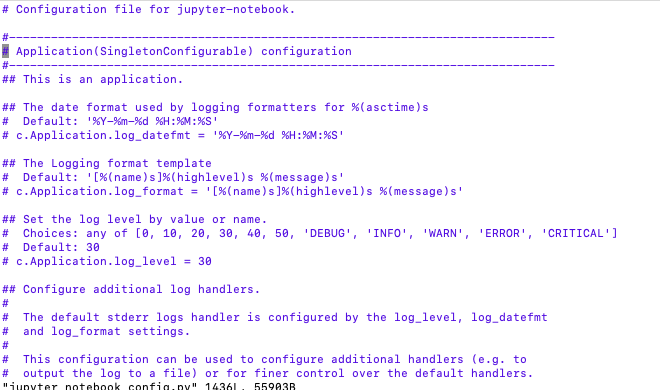